In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# using Seaborne for hist
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (precision_score, recall_score,
                             f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn import metrics
from sklearn.preprocessing import Normalizer
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dropout
from tensorflow.keras.models import Model

from sklearn.model_selection import train_test_split

from numpy.random import seed

sns.set(color_codes=True)
%matplotlib inline

# code for Tensorflow 2 !!!
print(tf.__version__)
assert(tf.__version__ >= '2.')

2.3.1


In [2]:
FILE_NAME = "physionet2017.csv"

data = pd.read_csv(FILE_NAME)

# shuffle the dataframe before splitting
data = data.sample(frac=1)

data.head()

,0,1,2,3,4,5,6,7,8,9,...,1992,1993,1994,1995,1996,1997,1998,1999,name,label
1457,-0.031525,-0.031525,-0.030792,-0.030792,-0.030059,-0.029326,-0.029326,-0.030059,-0.030792,-0.030792,...,0.014663,0.010997,0.005132,0.003666,0.002199,0.001466,0.000733,0.000000,A01/A01458,2
3078,-0.013409,-0.013409,-0.013409,-0.012703,-0.011291,-0.009880,-0.008469,-0.007057,-0.005646,-0.004234,...,-0.098095,-0.095977,-0.093860,-0.088920,-0.078335,-0.060692,-0.039520,-0.016231,A03/A03079,2
2118,-0.055921,-0.036184,-0.013158,0.003289,0.023026,0.039474,0.059211,0.078947,0.088816,0.092105,...,0.065789,0.052632,0.036184,0.019737,0.003289,-0.006579,-0.019737,-0.029605,A02/A02119,1
6983,0.026536,0.027933,0.030726,0.032123,0.032123,0.032123,0.032123,0.032123,0.030726,0.030726,...,-0.037709,-0.033520,-0.027933,-0.023743,-0.020950,-0.018156,-0.016760,-0.013966,A06/A06984,1
4771,0.241636,0.241636,0.241636,0.234201,0.226766,0.215613,0.200743,0.182156,0.144981,0.104089,...,-0.130112,-0.133829,-0.144981,-0.163569,-0.174721,-0.148699,-0.111524,-0.096654,A04/A04772,0


In [37]:
# let's try first with binary classification (normal, not normal)

#data.loc[data.label != 0, "label"] = 1

In [38]:
#data['label'].hist();

In [42]:
X = data.iloc[:, :2000]
Y = data.iloc[:, 2001]
print(Y)


1457    1
3078    1
2118    1
6983    1
4771    0
       ..
3825    1
1294    1
3314    0
4041    0
6919    1
Name: label, Length: 8528, dtype: int64


In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.1, random_state=3)

print('X_train: ', X_train.shape)
print('X_valid: ', X_valid.shape)

# need to trasnform to sort of image (2 dim tensor) for compatibility with input of CNN
X_train = np.expand_dims(X_train, axis = 2)

X_valid = np.expand_dims(X_valid, axis = 2)

X_train:  (7675, 2000)
X_valid:  (853, 2000)


In [49]:
y_valid.shape
y_valid

7563    1
7054    0
2859    0
1249    1
8365    0
       ..
3413    0
4798    0
7351    0
715     1
6721    0
Name: label, Length: 853, dtype: int64

In [43]:
# define the model

# arcitecture inspired by keras.io

def build_model(input_shape):
    # using Keras functional API
    input_layer = keras.layers.Input(input_shape)

    # kernel size changed from 3 to 5
    conv0 = keras.layers.Conv1D(filters=32, kernel_size=5, padding="same", activation = "relu")(input_layer)
    # conv0 = keras.layers.BatchNormalization()(conv0)
    conv0 = keras.layers.MaxPooling1D(pool_size=2)(conv0)
    
    conv1 = keras.layers.Conv1D(filters=32, kernel_size=5, padding="same", activation="relu")(conv0)
    conv1 = keras.layers.MaxPooling1D(pool_size=2)(conv1)
    
    conv2 = keras.layers.Conv1D(filters=64, kernel_size=5, padding="same", activation="relu")(conv1)
    conv2 = keras.layers.MaxPooling1D(pool_size=2)(conv2)
    
    conv3 = keras.layers.Conv1D(filters=64, kernel_size=5, padding="same", activation="relu")(conv2)
    conv3 = keras.layers.MaxPooling1D(pool_size=2)(conv3)
    
    conv4 = keras.layers.Conv1D(filters=128, kernel_size=5, padding="same", activation="relu")(conv3)
    conv4 = keras.layers.MaxPooling1D(pool_size=2)(conv4)
    
    conv5 = keras.layers.Conv1D(filters=128, kernel_size=5, padding="same", activation="relu")(conv4)
    conv5 = keras.layers.MaxPooling1D(pool_size=2)(conv5)
    conv5 = keras.layers.Dropout(0.5)(conv5)
    
    conv6 = keras.layers.Conv1D(filters=256, kernel_size=5, padding="same", activation="relu")(conv5)
    conv6 = keras.layers.MaxPooling1D(pool_size=2)(conv6)
    
    conv7 = keras.layers.Conv1D(filters=256, kernel_size=5, padding="same", activation="relu")(conv6)
    conv7 = keras.layers.MaxPooling1D(pool_size=2)(conv7)
    conv7 = keras.layers.Dropout(0.5)(conv7)
    
    conv8 = keras.layers.Conv1D(filters=512, kernel_size=5, padding="same", activation="relu")(conv7)
    conv8 = keras.layers.MaxPooling1D(pool_size=2)(conv8)
    conv8 = keras.layers.Dropout(0.5)(conv8)
    
    conv9 = keras.layers.Conv1D(filters=512, kernel_size=5, padding="same", activation="relu")(conv8)
    
    gap = keras.layers.Flatten()(conv9)
    dense1 = keras.layers.Dense(64, activation = "relu")(gap)
    dense2 = keras.layers.Dropout(0.5)(dense1)
    dense3 = keras.layers.Dense(32, activation = "relu")(dense2)
    
    output_layer = keras.layers.Dense(1, activation="sigmoid")(dense3)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)
    
    return model

In [62]:
NUM_EPOCHS = 10
BATCH_SIZE = 256
VAL_SPLIT = 0.2
VERBOSE = 1

import time

t_start = time.time()

# y = X
history = model.fit(X_train, y_train, batch_size = BATCH_SIZE, epochs = NUM_EPOCHS, validation_split = VAL_SPLIT, verbose = VERBOSE)

Epoch 1/10
24/24 [==============================] - 44s 2s/step - loss: 0.4878 - accuracy: 0.7793 - val_loss: 0.5307 - val_accuracy: 0.7355
Epoch 2/10
24/24 [==============================] - 46s 2s/step - loss: 0.4817 - accuracy: 0.7865 - val_loss: 0.5176 - val_accuracy: 0.7524
Epoch 3/10
24/24 [==============================] - 46s 2s/step - loss: 0.4787 - accuracy: 0.7873 - val_loss: 0.5288 - val_accuracy: 0.7362
Epoch 4/10
24/24 [==============================] - 45s 2s/step - loss: 0.4814 - accuracy: 0.7875 - val_loss: 0.5249 - val_accuracy: 0.7401
Epoch 5/10
24/24 [==============================] - 45s 2s/step - loss: 0.4710 - accuracy: 0.7912 - val_loss: 0.5338 - val_accuracy: 0.7394
Epoch 6/10
24/24 [==============================] - 45s 2s/step - loss: 0.4703 - accuracy: 0.7917 - val_loss: 0.5205 - val_accuracy: 0.7433
Epoch 7/10
24/24 [==============================] - 46s 2s/step - loss: 0.4731 - accuracy: 0.7920 - val_loss: 0.5701 - val_accuracy: 0.7218
Epoch 8/10
24/24 [==

In [63]:
seed(1234)
tf.random.set_seed(1234)


model = build_model(input_shape=(2000, 1))

# we need a smaller learning rate to have a smoother convergence
# it is really important
opt = keras.optimizers.Adam(learning_rate=0.00006)

mc = tf.keras.callbacks.ModelCheckpoint(
        'ecg5000.h5', monitor='val_loss', verbose=1, save_best_only=True,
        save_weights_only=True, mode='min', save_freq='epoch')

model.compile(
    optimizer=opt,
    loss="binary_crossentropy",
    metrics=["accuracy"])

model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 2000, 1)]         0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 2000, 32)          192       
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 1000, 32)          0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 1000, 32)          5152      
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 500, 32)           0         
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 500, 64)           10304     
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 250, 64)          

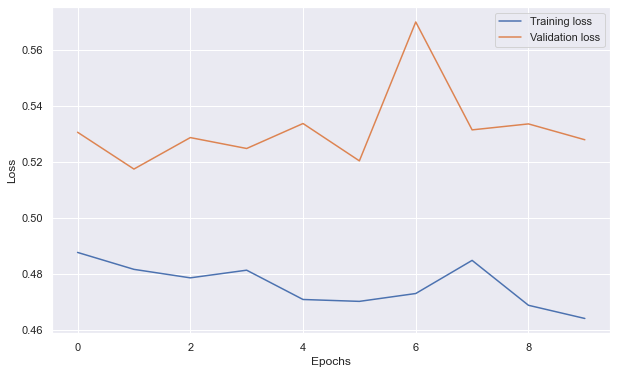

In [64]:
# visualize loss for the training
plt.figure(figsize = (10,6))
hist_loss = history.history['loss']
hist_val_loss = history.history['val_loss']

plt.plot(hist_loss, label='Training loss')
plt.plot(hist_val_loss, label='Validation loss')

plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

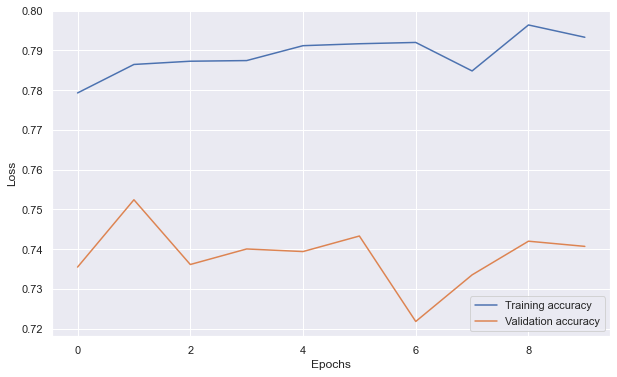

In [65]:
# visualize accuracy for the training
plt.figure(figsize = (10,6))
hist_loss = history.history['accuracy']
hist_val_loss = history.history['val_accuracy']

plt.plot(hist_loss, label='Training accuracy')
plt.plot(hist_val_loss, label='Validation accuracy')

plt.legend(loc='lower right')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

In [61]:
loss, accuracy = model.evaluate(X_valid, y_valid)




27/27 [==============================] - 1s 34ms/step - loss: 0.5412 - accuracy: 0.7222
